# ERGM

In [1]:
library(RCurl)

In [3]:
library(ergm)

In [5]:
library(latticeExtra)

In [6]:
nl <- read.table('../grey_nodes.tsv', sep="\t", header=T, quote="\"",
                    stringsAsFactors=F, strip.white=T, as.is=T)

In [7]:
adj<-as.matrix(read.table(('../grey_adjacency_mod.tsv'), sep="\t",
                             header=T, row.names=1, quote="\""))

In [8]:
net <- network(adj, vertex.attr=nl, vertex.attrnames=colnames(nl),
                  directed=F, hyper=F, loops=F, multiple=F, bipartite=F)

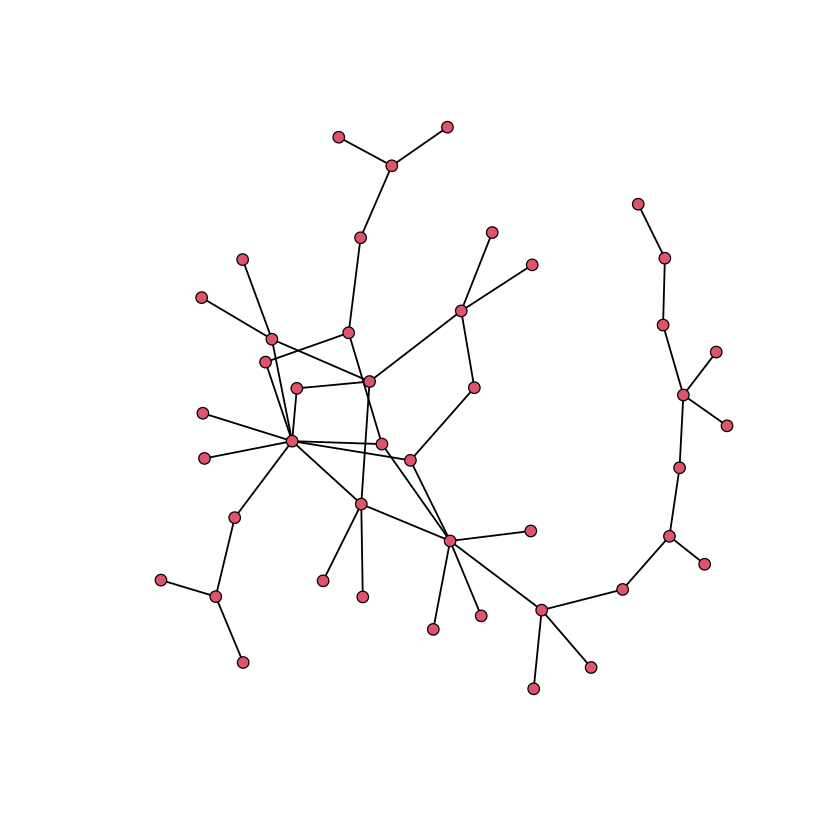

In [9]:
plot(net)

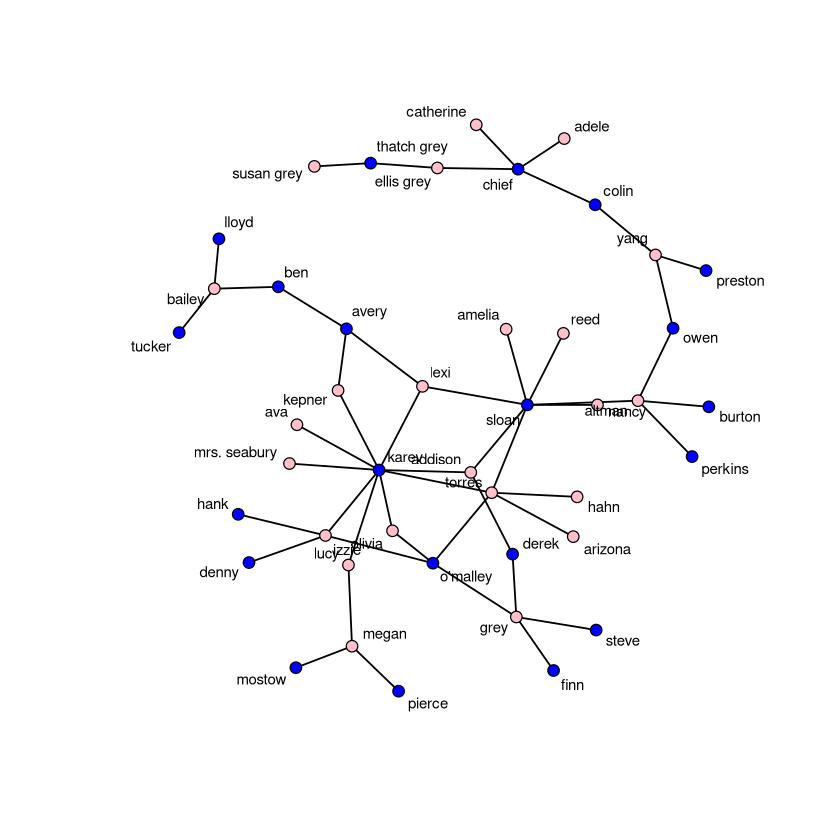

In [12]:
plot(net, vertex.col=c("blue","pink")[1+(get.vertex.attribute(net, "sex")=="F")],
     label=get.vertex.attribute(net, "name"), label.cex=.75)

In [13]:
list.vertex.attributes(net)

[1] "birthyear"    "na"           "name"         "position"     "race"        
[6] "season"       "sex"          "sign"         "vertex.names"

In [14]:
get.vertex.attribute(net, "name")

[1] "addison"      "adele"        "altman"       "amelia"       "arizona"     
 [6] "ava"          "avery"        "bailey"       "ben"          "burton"      
[11] "catherine"    "chief"        "colin"        "denny"        "derek"       
[16] "ellis grey"   "finn"         "grey"         "hahn"         "hank"        
[21] "izzie"        "karev"        "kepner"       "lexi"         "lloyd"       
[26] "lucy"         "megan"        "mostow"       "mrs. seabury" "nancy"       
[31] "olivia"       "o'malley"     "owen"         "perkins"      "pierce"      
[36] "preston"      "reed"         "sloan"        "steve"        "susan grey"  
[41] "thatch grey"  "torres"       "tucker"       "yang"

In [15]:
get.vertex.attribute(net, "sex")

[1] "F" "F" "F" "F" "F" "F" "M" "F" "M" "M" "F" "M" "M" "M" "M" "F" "M" "F" "F"
[20] "M" "F" "M" "F" "F" "M" "F" "F" "M" "F" "F" "F" "M" "M" "M" "M" "M" "F" "M"
[39] "M" "F" "M" "F" "M" "F"

In [23]:
grey.base <- ergm(net~edges+nodematch("sex"))

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 




In [24]:
summary(grey.base)

Call:
ergm(formula = net ~ edges + nodematch("sex"))

Iterations:  6 out of 20 

Monte Carlo MLE Results:
              Estimate Std. Error MCMC % z value Pr(>|z|)    
edges          -2.3003     0.1581      0 -14.547   <1e-04 ***
nodematch.sex  -2.2171     0.4766      0  -4.652   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 1311.4  on 946  degrees of freedom
 Residual Deviance:  349.9  on 944  degrees of freedom
 
AIC: 353.9    BIC: 363.6    (Smaller is better.) 

Generating random model

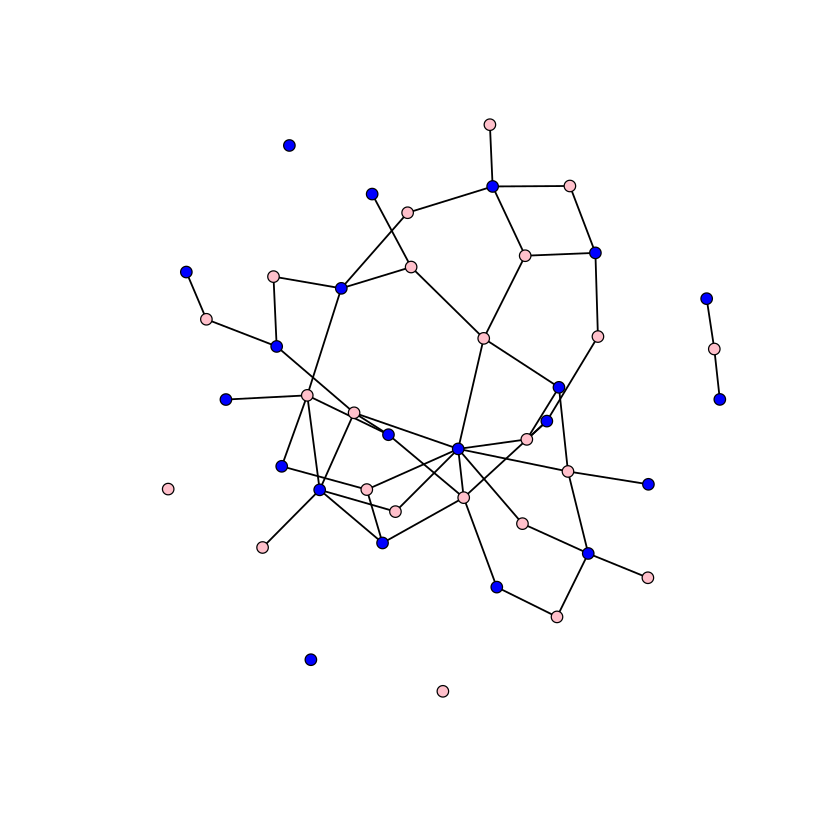

In [33]:
plot(simulate(grey.base),
     vertex.col=c("blue","pink")[ 1+(get.vertex.attribute(net, "sex")=="F")])

Testing

In [34]:
grey.base.gof <- gof(grey.base)

In [35]:
summary(grey.base.gof)

               Length Class   Mode   
network.size      1   -none-  numeric
GOF               2   formula call   
pval.model       10   -none-  numeric
summary.model    10   -none-  numeric
pobs.model        2   -none-  numeric
psim.model      200   -none-  numeric
bds.model         4   -none-  numeric
obs.model         2   -none-  numeric
sim.model       200   -none-  numeric
pval.dist       220   -none-  numeric
summary.dist    220   -none-  numeric
pobs.dist        44   -none-  numeric
psim.dist      4400   -none-  numeric
bds.dist         88   -none-  numeric
obs.dist         44   -none-  numeric
sim.dist       4400   -none-  numeric
pval.deg        220   -none-  numeric
summary.deg     220   -none-  numeric
pobs.deg         44   -none-  numeric
psim.deg       4400   -none-  numeric
bds.deg          88   -none-  numeric
obs.deg          44   -none-  numeric
sim.deg        4400   -none-  numeric
pval.espart     215   -none-  numeric
summary.espart  215   -none-  numeric
pobs.espart 

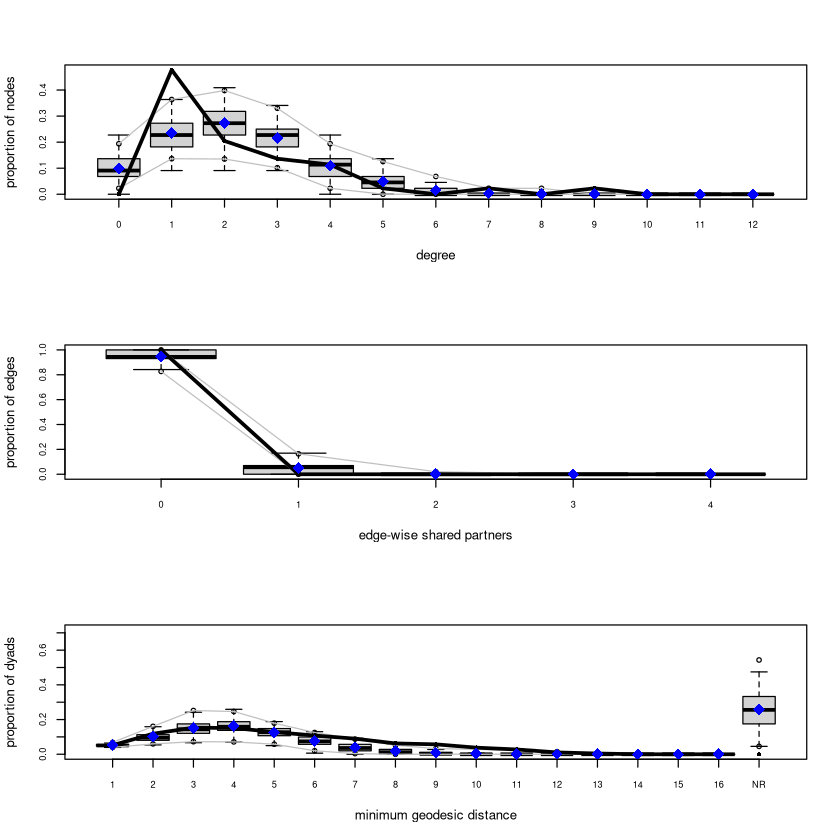

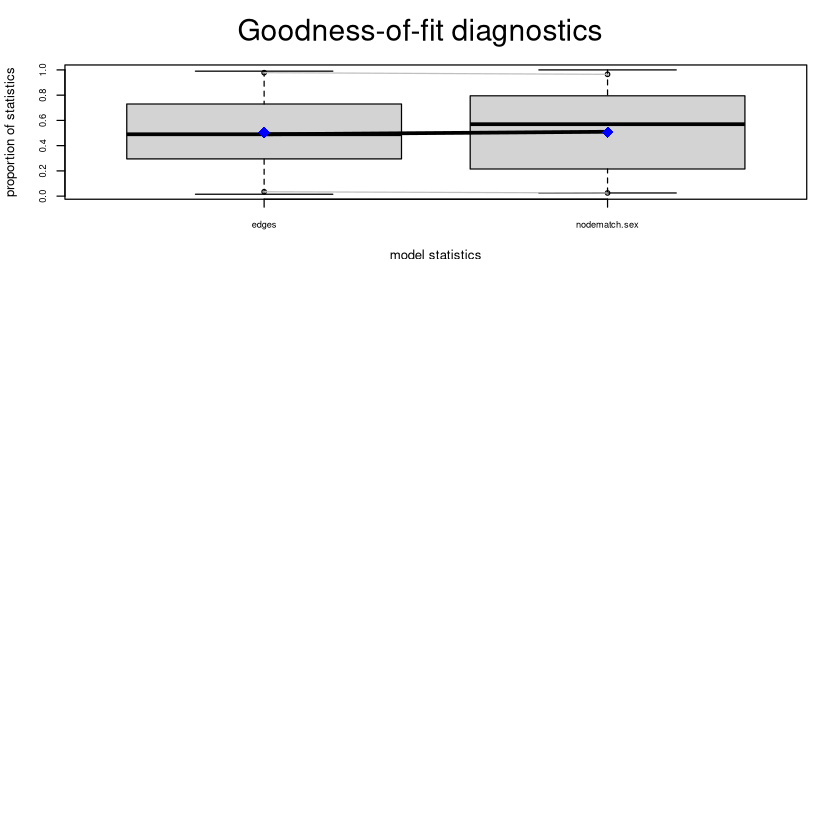

In [36]:
par(mfrow=c(3,1))
plot(grey.base.gof)

In [38]:
grey.base.d1 <- ergm(net~edges+nodematch("sex")+degree(1))

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 1.214.

Step length converged once. Increasing MCMC sample size.

Iteration 2 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.3011.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Using 20 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagnostics() function.



In [39]:
summary(grey.base.d1)

Call:
ergm(formula = net ~ edges + nodematch("sex") + degree(1))

Iterations:  2 out of 20 

Monte Carlo MLE Results:
              Estimate Std. Error MCMC % z value Pr(>|z|)    
edges          -1.5890     0.2076      0  -7.654  < 1e-04 ***
nodematch.sex  -2.2311     0.4305      0  -5.182  < 1e-04 ***
degree1         1.7789     0.4574      0   3.889 0.000101 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 1311  on 946  degrees of freedom
 Residual Deviance:  332  on 943  degrees of freedom
 
AIC: 338    BIC: 352.6    (Smaller is better.) 

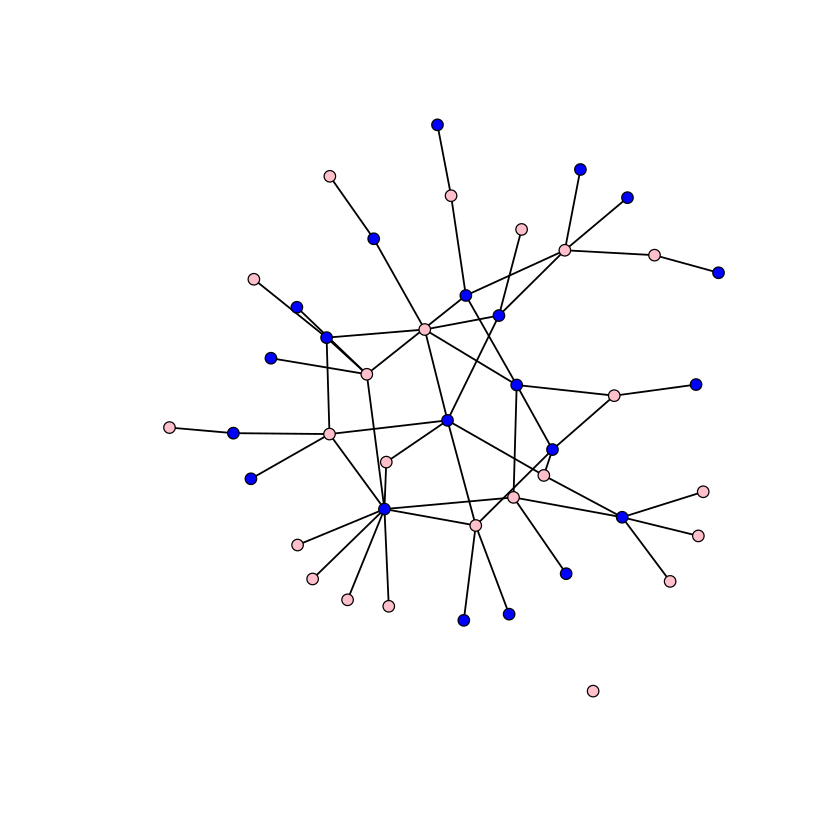

In [47]:
par(mfrow=c(1,1))
plot(simulate(grey.base.d1),
     vertex.col=c("blue","pink")[1+(get.vertex.attribute(net, "sex")=="F")])

In [48]:
grey.base.d1.gof <- gof(grey.base.d1)
summary(grey.base.d1.gof)

               Length Class   Mode   
network.size      1   -none-  numeric
GOF               2   formula call   
pval.model       15   -none-  numeric
summary.model    15   -none-  numeric
pobs.model        3   -none-  numeric
psim.model      300   -none-  numeric
bds.model         6   -none-  numeric
obs.model         3   -none-  numeric
sim.model       300   -none-  numeric
pval.dist       220   -none-  numeric
summary.dist    220   -none-  numeric
pobs.dist        44   -none-  numeric
psim.dist      4400   -none-  numeric
bds.dist         88   -none-  numeric
obs.dist         44   -none-  numeric
sim.dist       4400   -none-  numeric
pval.deg        220   -none-  numeric
summary.deg     220   -none-  numeric
pobs.deg         44   -none-  numeric
psim.deg       4400   -none-  numeric
bds.deg          88   -none-  numeric
obs.deg          44   -none-  numeric
sim.deg        4400   -none-  numeric
pval.espart     215   -none-  numeric
summary.espart  215   -none-  numeric
pobs.espart 

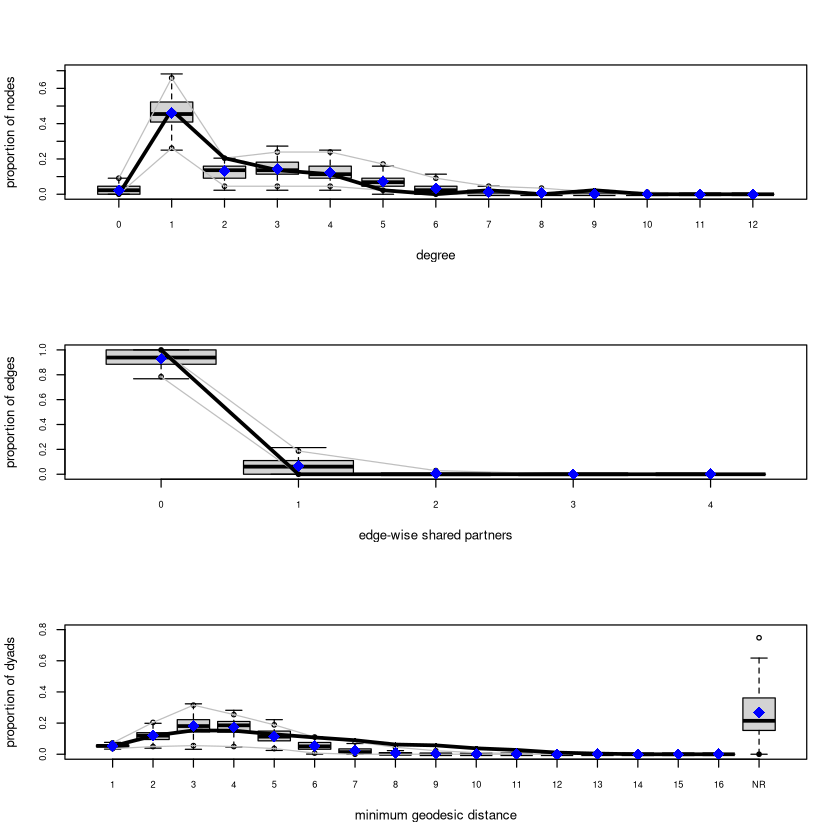

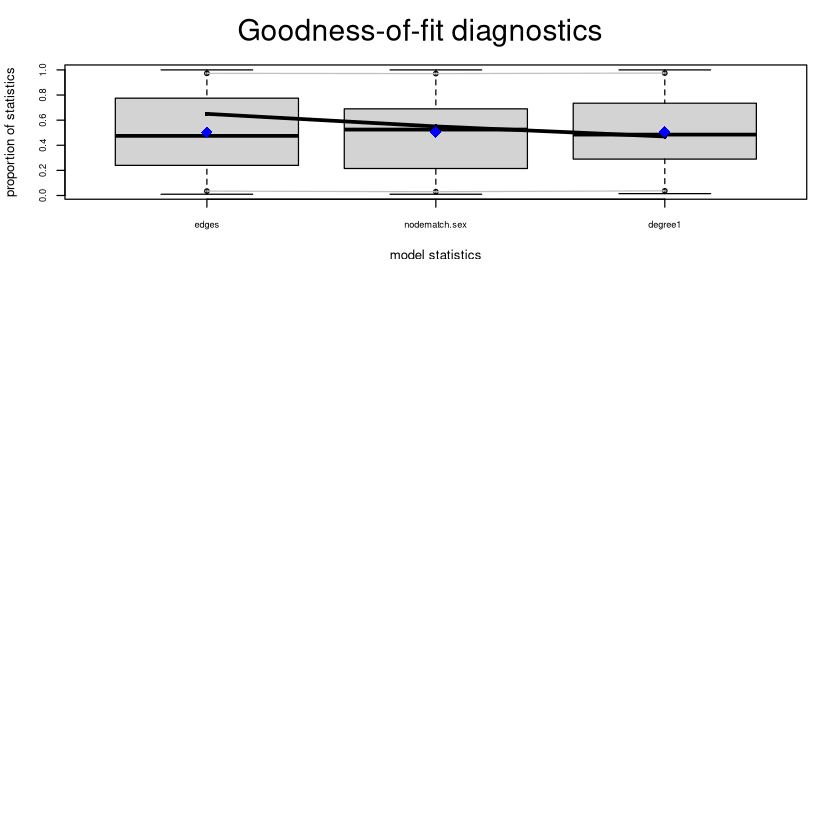

In [49]:
par(mfrow=c(3,1))
plot(grey.base.d1.gof)

Sample statistics summary:

Iterations = 16384:4209664
Thinning interval = 1024 
Number of chains = 1 
Sample size per chain = 4096 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                Mean     SD Naive SE Time-series SE
edges          7.592 11.519  0.17998        0.24862
nodematch.sex  1.271  2.723  0.04255        0.04565
degree1       -2.118  5.008  0.07825        0.10186

2. Quantiles for each variable:

              2.5% 25% 50% 75% 97.5%
edges          -12  -1   6  15    33
nodematch.sex   -3  -1   1   3     7
degree1        -12  -6  -2   1     7


Sample statistics cross-correlations:
                   edges nodematch.sex    degree1
edges          1.0000000     0.5205443 -0.8994682
nodematch.sex  0.5205443     1.0000000 -0.4532640
degree1       -0.8994682    -0.4532640  1.0000000

Sample statistics auto-correlation:
Chain 1 
                edges nodematch.sex      degree1
Lag 0    1.0000000000  1.0000000000  1.00000

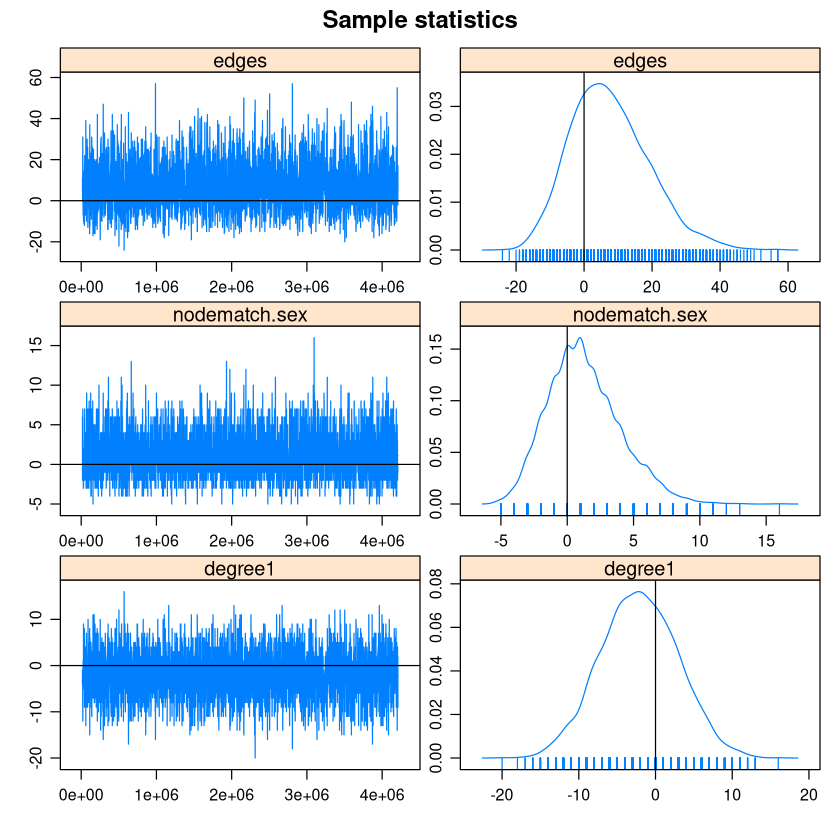

In [50]:
mcmc.diagnostics(grey.base.d1)